In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_fjtUOL8.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_fNxu4vz.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_HSqiq1Q.csv

--2020-05-31 17:02:28--  https://datahack-prod.s3.amazonaws.com/test_file/test_fjtUOL8.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.44
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10267273 (9.8M) [text/csv]
Saving to: ‘test_fjtUOL8.csv’

test_fjtUOL8.csv    100%[===================>]   9.79M  4.58MB/s    in 2.1s    

2020-05-31 17:02:32 (4.58 MB/s) - ‘test_fjtUOL8.csv’ saved [10267273/10267273]

--2020-05-31 17:02:35--  https://datahack-prod.s3.amazonaws.com/train_file/train_fNxu4vz.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15734857 (15M) [text/csv]
Saving to: ‘train_fNxu4vz.csv’

train_fNxu4vz.csv   100%[====

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('train_fNxu4vz.csv')
test = pd.read_csv('test_fjtUOL8.csv')

In [4]:
train.head(2
      )

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3


In [5]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Loan_ID                        0
 Loan_Amount_Requested          0
 Length_Employed             7371
 Home_Owner                 25349
 Annual_Income              25102
 Income_Verified                0
 Purpose_Of_Loan                0
 Debt_To_Income                 0
 Inquiries_Last_6Mo             0
 Months_Since_Deliquency    88379
 Number_Open_Accounts           0
 Total_Accounts                 0
 Gender                         0
 Interest_Rate                  0
 dtype: int64, Loan_ID                        0
 Loan_Amount_Requested          0
 Length_Employed             4936
 Home_Owner                 16711
 Annual_Income              16898
 Income_Verified                0
 Purpose_Of_Loan                0
 Debt_To_Income                 0
 Inquiries_Last_6Mo             0
 Months_Since_Deliquency    58859
 Number_Open_Accounts           0
 Total_Accounts                 0
 Gender                         0
 dtype: int64, (164309, 14), (109541, 13), Loan_ID                  

In [0]:
k=['Length_Employed','Home_Owner','Months_Since_Deliquency','Annual_Income']
for i in k:
  if i=='Annual_Income':
    train[i] = train[i].fillna(train[i].mean())
    test[i] = test[i].fillna(test[i].mean())    
  else:
    train[i] = train[i].fillna(method='bfill')
    test[i] = test[i].fillna(method='bfill')
train['Months_Since_Deliquency']=train['Months_Since_Deliquency'].fillna(method='ffill')

In [0]:
k=['Length_Employed','Home_Owner','Annual_Income','Income_Verified','Purpose_Of_Loan','Gender']
for i in k:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

In [0]:
train['Loan_Amount_Requested']=train.Loan_Amount_Requested.str.replace(',', '')
test['Loan_Amount_Requested']=test.Loan_Amount_Requested.str.replace(',', '')
train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].astype(int)
test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].astype(int)

# pyret

In [0]:
!pip3 install pycaret --upgrade

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 102kB 6.9MB/s 
     |████████████████████████████████| 7.0MB 6.9MB/s 
     |████████████████████████████████| 3.1MB 41.3MB/s 
     |████████████████████████████████| 1.2MB 40.0MB/s 
     |████████████████████████████████| 133kB 51.7MB/s 
     |████████████████████████████████| 266kB 37.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 63.9MB 62kB/s 
     |████████████████████████████████| 1.6MB 41.9MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 389kB 44.8MB/s 
     |████████████████████████████████| 2.1MB 41.0MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 6.2MB 41.2MB/s 
     |████████████████████████████████| 604kB 41.9MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 552kB 40.2MB/s 
    

In [0]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= train, target='Interest_Rate')

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:00:10
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Loan_ID,ID Column
Loan_Amount_Requested,Numeric
Length_Employed,Categorical
Home_Owner,Categorical
Annual_Income,Numeric
Income_Verified,Categorical
Purpose_Of_Loan,Categorical
Debt_To_Income,Numeric
Inquiries_Last_6Mo,Categorical
Months_Since_Deliquency,Numeric


KeyboardInterrupt: ignored

In [0]:
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4228,0.0,0.3855,0.4172,0.3938,0.0827
1,0.4186,0.0,0.3838,0.4178,0.3908,0.0786
2,0.4120,0.0,0.3805,0.4050,0.3802,0.0690
3,0.4087,0.0,0.3763,0.4005,0.3788,0.0639
4,0.4139,0.0,0.3772,0.4043,0.3818,0.0707
5,0.4226,0.0,0.3926,0.4202,0.3943,0.0880
6,0.4188,0.0,0.3871,0.4205,0.3904,0.0795
7,0.4278,0.0,0.3941,0.4300,0.4003,0.0917
8,0.4191,0.0,0.3851,0.4177,0.3903,0.0786
9,0.4264,0.0,0.3932,0.4201,0.3951,0.0945


In [0]:
# build the xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5442,0.0,0.4783,0.5485,0.5183,0.2487
1,0.5122,0.0,0.4482,0.5215,0.4850,0.1943
2,0.5243,0.0,0.4578,0.5285,0.4958,0.2144
3,0.5165,0.0,0.4521,0.5443,0.4896,0.1980
4,0.5318,0.0,0.4608,0.5362,0.4990,0.2243
5,0.5294,0.0,0.4643,0.5418,0.5022,0.2228
6,0.5165,0.0,0.4530,0.5224,0.4906,0.2024
7,0.5290,0.0,0.4607,0.5428,0.4985,0.2202
8,0.5301,0.0,0.4609,0.5350,0.5000,0.2218
9,0.5217,0.0,0.4516,0.5156,0.4898,0.2085


In [0]:
!pip install catboost

In [0]:

# build and tune the catboost model
tune_catboost = classification.tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5365,0.0,0.4818,0.5311,0.5206,0.2457
1,0.5153,0.0,0.4631,0.5200,0.4986,0.2083
2,0.5223,0.0,0.4667,0.5180,0.5039,0.2206
3,0.5148,0.0,0.4632,0.5217,0.4990,0.2067
4,0.5214,0.0,0.4652,0.5158,0.5027,0.2190
5,0.5277,0.0,0.4744,0.5314,0.5111,0.2286
6,0.5221,0.0,0.4659,0.5180,0.5035,0.2196
7,0.5322,0.0,0.4741,0.5355,0.5115,0.2339
8,0.5197,0.0,0.4603,0.5200,0.4987,0.2115
9,0.5162,0.0,0.4578,0.5110,0.4962,0.2079


In [0]:
# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

SystemExit: ignored

In [0]:
# Ensemble: blending
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

SystemExit: ignored

In [0]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.526700,0.000000,0.461500,0.533800,0.499800,0.218600
1,Extreme Gradient Boosting,0.525600,0.000000,0.458800,0.533700,0.496900,0.215500
2,Light Gradient Boosting Machine,0.524900,0.000000,0.468200,0.526000,0.505700,0.222400
3,CatBoost Classifier,0.524600,0.000000,0.470000,0.524900,0.507100,0.223400
4,Ada Boost Classifier,0.522300,0.000000,0.458900,0.524500,0.496700,0.213200
5,Linear Discriminant Analysis,0.518000,0.000000,0.450100,0.523000,0.487000,0.202500
6,Ridge Classifier,0.513800,0.000000,0.435500,0.520200,0.467400,0.188500
7,Naive Bayes,0.506000,0.000000,0.451200,0.507500,0.487700,0.190800
8,Logistic Regression,0.483600,0.000000,0.409700,0.476500,0.441300,0.138000
9,Extra Trees Classifier,0.480600,0.000000,0.435700,0.471700,0.468600,0.161600


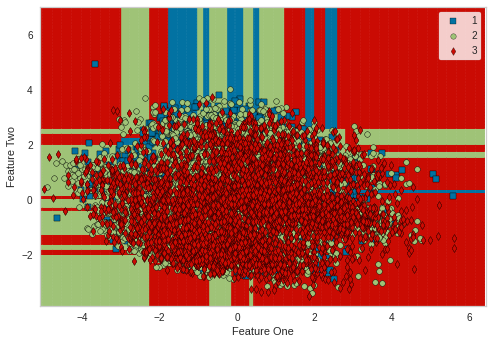

In [0]:
# Decision Boundary
classification.plot_model(tune_catboost, plot = 'boundary')

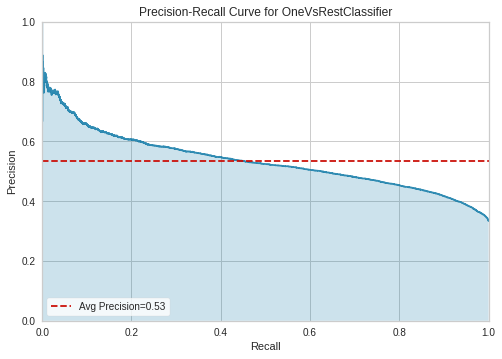

In [0]:
classification.plot_model(tune_catboost, plot = 'pr')

In [0]:
# make predictions
predictions = classification.predict_model(tune_catboost, data=test)
# view the predictions
predictions

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Label
0,10164310,27500,1,0,17062,0,2,12.87,0,68.0,10,37,1,3
1,10164311,26000,1,4,16203,2,1,11.37,0,26.0,6,23,1,1
2,10164312,6075,10,4,12288,0,2,6.83,2,26.0,5,20,1,3
3,10164313,12000,1,0,11941,1,2,7.76,0,26.0,6,8,1,2
4,10164314,35000,10,0,17683,2,2,9.62,0,26.0,9,21,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,15000,9,0,16719,0,9,8.15,2,32.0,13,57,1,3
109537,10273847,9600,1,0,16919,2,1,9.08,1,17.0,9,34,1,1
109538,10273848,2000,5,4,3788,2,1,11.60,0,60.0,10,11,1,2
109539,10273849,2125,6,4,2160,2,9,24.88,0,60.0,5,6,1,2


In [0]:
predictions['Label'].value_counts()

2    60730
3    40189
1     8622
Name: Label, dtype: int64

In [0]:
sub = pd.DataFrame(data={'Loan_ID' : test.Loan_ID, 'Interest_Rate' : predictions['Label']})
sub.to_csv('ag.csv', index=False)

In [0]:
from google.colab import files
files.download('ag.csv')

# def rule

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [0]:
X = train.drop(columns=['Loan_ID', 'Interest_Rate'])
y = train.Interest_Rate

In [0]:
print('Percentage of each class in Target Variable \n')
print((train.Interest_Rate.value_counts()/len(train))*100)

Percentage of each class in Target Variable 

2    42.955651
3    36.469700
1    20.574649
Name: Interest_Rate, dtype: float64


In [0]:
X_test = test.drop(columns=['Loan_ID'])
concat = pd.concat(objs=[X, X_test], axis=0)

In [0]:
y = train.Interest_Rate
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
Loan_Amount_Requested,1.00000,-0.05382,-0.17359,0.46503,-0.36199,-0.15183,0.05831,-0.00766,-0.02064,0.20309,0.23342,0.00147,0.13249
Length_Employed,-0.05382,1.00000,0.06351,-0.06912,0.01685,0.01318,-0.01336,0.00047,0.01354,-0.02059,-0.06205,-0.00156,-0.00420
Home_Owner,-0.17359,0.06351,1.00000,-0.22336,0.07131,0.03220,0.00406,-0.05115,0.01936,-0.11449,-0.19482,0.00006,0.05436
Annual_Income,0.46503,-0.06912,-0.22336,1.00000,-0.11911,-0.01291,-0.17838,0.06699,-0.03943,0.21158,0.29921,0.00005,-0.07433
Income_Verified,-0.36199,0.01685,0.07131,-0.11911,1.00000,0.00821,-0.11414,-0.06653,-0.00018,-0.06779,-0.09907,-0.00477,-0.21337
Purpose_Of_Loan,-0.15183,0.01318,0.03220,-0.01291,0.00821,1.00000,-0.10903,0.05245,-0.00384,-0.08940,-0.07034,0.00214,0.10725
Debt_To_Income,0.05831,-0.01336,0.00406,-0.17838,-0.11414,-0.10903,1.00000,-0.00514,0.00115,0.30244,0.22987,-0.00039,0.15247
Inquiries_Last_6Mo,-0.00766,0.00047,-0.05115,0.06699,-0.06653,0.05245,-0.00514,1.00000,0.00578,0.10093,0.13147,0.00056,0.18899
Months_Since_Deliquency,-0.02064,0.01354,0.01936,-0.03943,-0.00018,-0.00384,0.00115,0.00578,1.00000,-0.02533,-0.03084,-0.00229,-0.01858
Number_Open_Accounts,0.20309,-0.02059,-0.11449,0.21158,-0.06779,-0.08940,0.30244,0.10093,-0.02533,1.00000,0.68214,0.00129,0.00285


In [0]:
lgbmc = LGBMClassifier(random_state=142, n_estimators=500, colsample_bytree=1, 
                       max_depth=15, learning_rate=0.1, boosting_type='gbdt')
cross_val_score(lgbmc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


0.5157802472388535

In [0]:
lgbmc.fit(X, y)
j = lgbmc.predict(X_test)


In [0]:
sub = pd.DataFrame(data={'Loan_ID' : test.Loan_ID, 'Interest_Rate' : predictions['Label']})
sub.to_csv('catt.csv', index=False)
from google.colab import files
files.download('catt.csv')

# cat

In [0]:
train_df=train

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Interest_Rate'] = le.fit_transform(train_df['Interest_Rate'])
le.classes_

array([0, 1, 2])

In [0]:
X = train_df.drop(labels=['Interest_Rate'], axis=1)
y = train_df['Interest_Rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [62]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((123231, 13), (123231,), (41078, 13), (41078,))

In [63]:

categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:
from math import sqrt 
from sklearn.metrics import f1_score

In [65]:
!pip install catboost

In [70]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='TotalF1', 
                         depth=3,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.4145232	test: 0.4145232	test1: 0.4199223	best: 0.4199223 (0)	total: 74.5ms	remaining: 1m 14s
50:	learn: 0.4600246	test: 0.4600246	test1: 0.4628289	best: 0.4628289 (50)	total: 3.64s	remaining: 1m 7s
100:	learn: 0.4826547	test: 0.4826547	test1: 0.4842387	best: 0.4842387 (100)	total: 7.17s	remaining: 1m 3s
150:	learn: 0.4930885	test: 0.4930885	test1: 0.4958989	best: 0.4958989 (150)	total: 10.7s	remaining: 1m
200:	learn: 0.4979902	test: 0.4979902	test1: 0.5006840	best: 0.5006840 (200)	total: 14.2s	remaining: 56.5s
250:	learn: 0.5021415	test: 0.5021415	test1: 0.5032998	best: 0.5032998 (250)	total: 17.7s	remaining: 52.9s
300:	learn: 0.5052272	test: 0.5052272	test1: 0.5045131	best: 0.5045524 (299)	total: 21.2s	remaining: 49.3s
350:	learn: 0.5073178	test: 0.5073178	test1: 0.5056343	best: 0.5059733 (341)	total: 24.7s	remaining: 45.7s
400:	learn: 0.5088202	test: 0.5088202	test1: 0.5064781	best: 0.5065468 (382)	total: 28.2s	remaining: 42.2s
450:	learn: 0.5104398	test: 0.5104398	test1:

In [71]:
predictions = cat.predict(X_cv)
print('f1_score:', f1_score(y_cv, predictions,average='weighted'))

f1_score: 0.5126517581743185


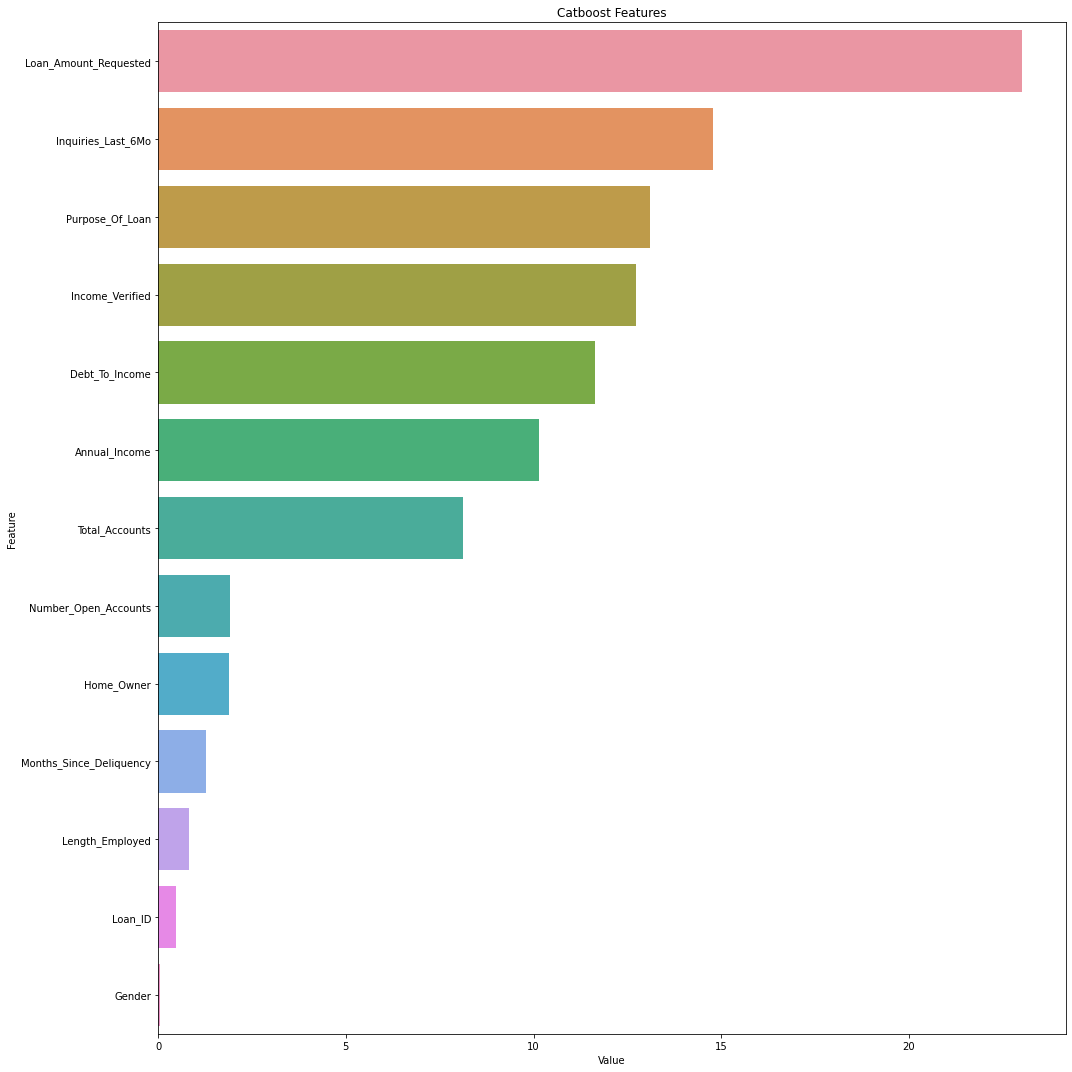

In [72]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:

from sklearn.model_selection import KFold
errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='TotalF1', 
                         depth=3,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("f1_score: ", f1_score(y_test,y_pred_cat,average='micro'))

    errcat.append(f1_score(y_test,y_pred_cat,average='micro'))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

In [91]:
np.mean(errcat,0)

0.5281175826182216

In [92]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[1],
       [0],
       [2],
       ...,
       [1],
       [2],
       [1]])

In [93]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Interest_Rate'])
df_sub.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Interest_Rate
0,1
1,0
2,2
3,1
4,1


In [95]:
df_sub['Interest_Rate'].value_counts()

2    59997
3    40544
1     9000
Name: Interest_Rate, dtype: int64

In [0]:
sub = pd.DataFrame(data={'Loan_ID' : test.Loan_ID, 'Interest_Rate' : df_sub['Interest_Rate']})
sub.to_csv('catt.csv', index=False)
from google.colab import files
files.download('catt.csv')